In [1]:
import pandas as pd

df = pd.read_csv('MSFT(5).csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060396,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062553,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063632,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062014,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060936,47894400
...,...,...,...,...,...,...,...
9490,2023-11-07,359.399994,362.459991,357.630005,360.529999,360.529999,25833900
9491,2023-11-08,361.679993,363.869995,360.549988,363.200012,363.200012,26767800
9492,2023-11-09,362.299988,364.790009,360.359985,360.690002,360.690002,24847300
9493,2023-11-10,361.489990,370.100006,361.070007,369.670013,369.670013,28042100


In [2]:
df = df[['Date', 'Close']]

df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9490,2023-11-07,360.529999
9491,2023-11-08,363.200012
9492,2023-11-09,360.690002
9493,2023-11-10,369.670013


In [3]:
df['Date']

0       1986-03-13
1       1986-03-14
2       1986-03-17
3       1986-03-18
4       1986-03-19
           ...    
9490    2023-11-07
9491    2023-11-08
9492    2023-11-09
9493    2023-11-10
9494    2023-11-13
Name: Date, Length: 9495, dtype: object

In [4]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-15')
datetime_object

datetime.datetime(1986, 3, 15, 0, 0)

In [5]:
df

,Date,Close
0,1986-03-13,0.097222
1,1986-03-14,0.100694
2,1986-03-17,0.102431
3,1986-03-18,0.099826
4,1986-03-19,0.098090
...,...,...
9490,2023-11-07,360.529999
9491,2023-11-08,363.200012
9492,2023-11-09,360.690002
9493,2023-11-10,369.670013


In [6]:
df['Date'] = df['Date'].apply(str_to_datetime)
df['Date']

<ipython-input-6-f6fc52bb0fa5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


0      1986-03-13
1      1986-03-14
2      1986-03-17
3      1986-03-18
4      1986-03-19
          ...    
9490   2023-11-07
9491   2023-11-08
9492   2023-11-09
9493   2023-11-10
9494   2023-11-13
Name: Date, Length: 9495, dtype: datetime64[ns]

In [7]:
df.index = df.pop('Date')
df

,Close
Date,
1986-03-13,0.097222
1986-03-14,0.100694
1986-03-17,0.102431
1986-03-18,0.099826
1986-03-19,0.098090
...,...
2023-11-07,360.529999
2023-11-08,363.200012
2023-11-09,360.690002


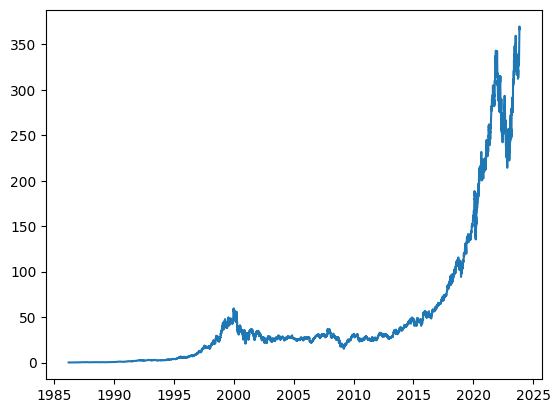

In [8]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [9]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2022-03-15'
windowed_df = df_to_windowed_df(df,
                                '2022-03-15',
                                '2023-03-13',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2022-03-15,285.589996,280.070007,276.440002,287.149994
1,2022-03-16,280.070007,276.440002,287.149994,294.390015
2,2022-03-17,276.440002,287.149994,294.390015,295.220001
3,2022-03-18,287.149994,294.390015,295.220001,300.429993
4,2022-03-21,294.390015,295.220001,300.429993,299.160004
...,...,...,...,...,...
245,2023-03-07,251.110001,255.289993,256.869995,254.149994
246,2023-03-08,255.289993,256.869995,254.149994,253.699997
247,2023-03-09,256.869995,254.149994,253.699997,252.320007
248,2023-03-10,254.149994,253.699997,252.320007,248.589996


In [10]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((250,), (250, 3, 1), (250,))

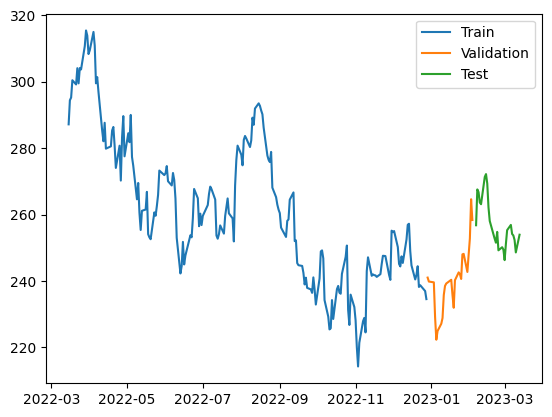

In [11]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 7s 110ms/step - loss: 69112.9531 - mean_absolute_error: 261.9666 - val_loss: 57797.4805 - val_mean_absolute_error: 240.2139
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 68859.3438 - mean_absolute_error: 261.4825 - val_loss: 57601.8398 - val_mean_absolute_error: 239.8064
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 68623.7344 - mean_absolute_error: 261.0326 - val_loss: 57368.3945 - val_mean_absolute_error: 239.3191
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 68365.4688 - mean_absolute_error: 260.5370 - val_loss: 57085.1133 - val_mean_absolute_error: 238.7266
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 68010.7266 - mean_absolute_error: 259.8574 - val_loss: 56707.0742 - val_mean_absolute_error: 237.9334
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 67522.7812 - mean_absolute_error: 258.9147 - val_loss: 56129

7/7 [==============================] - 1s 4ms/step


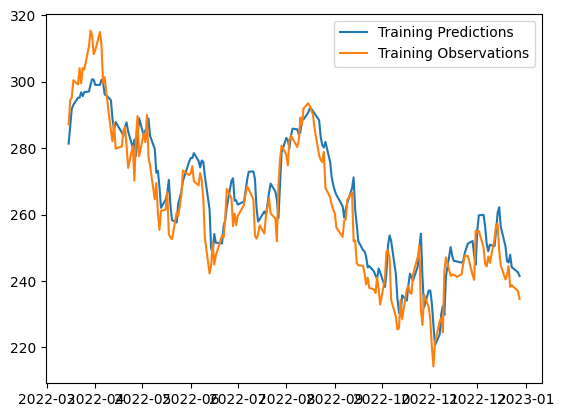

In [13]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 36ms/step


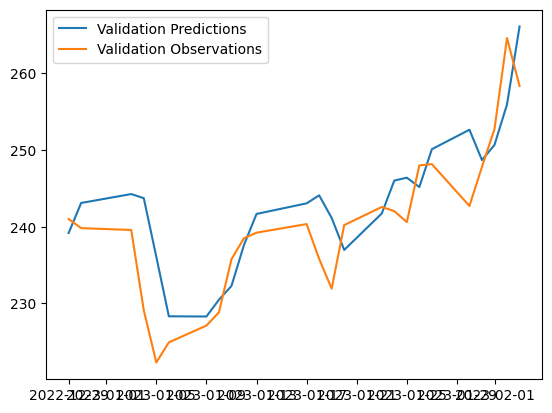

In [14]:
val_predictions = model.predict(X_val).flatten()

plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

1/1 [==============================] - 0s 31ms/step


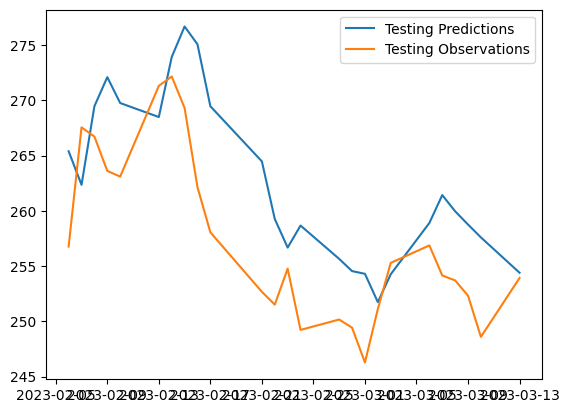

In [15]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

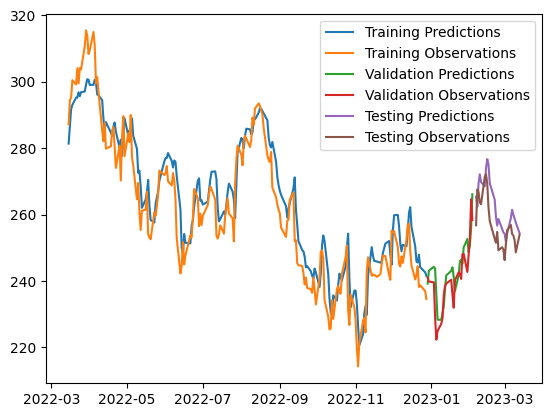

In [16]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [17]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 [==============================] - 0s 20ms/step


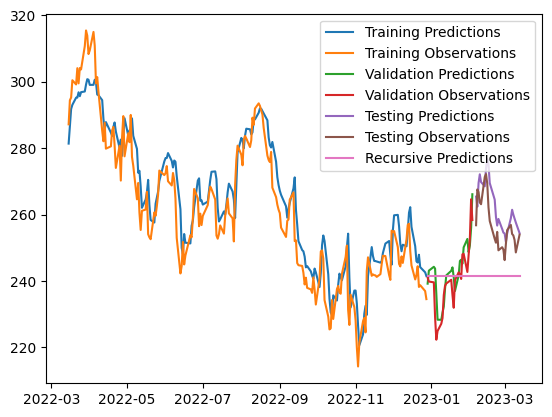

In [18]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])